In [97]:
import random
import numpy as np
import matplotlib.pyplot as plt
from trace_graph import trace, draw_dot
%matplotlib inline

In [98]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [99]:
# test data, inputs, weights, test backprop function

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n' 
o = n.tanh(); o.label = 'o'
o.backward()

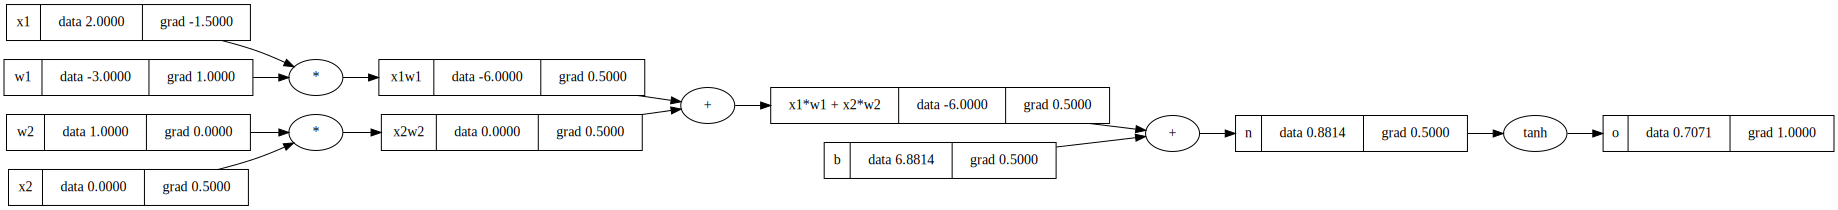

In [100]:
draw_dot(o)

In [106]:
# initialiazing a simple multi layer perceptron
# just by calling the .nn library
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.6410160800967581)

In [107]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

# TARGETS

ys = [0.0, 1.0, 0.0, 1.0]

In [108]:

for k in range (100):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  # print the loss func as it approaches to 0 (hopefully)
  print(k, loss.data)


0 5.8505454568582325
1 1.2264212693599135
2 0.9286097127921829
3 0.7172538473860826
4 0.32246181236778687
5 0.1238921538914537
6 0.06887753094969146
7 0.05255166034639998
8 0.02930804903852984
9 0.020363215484596277
10 0.01683911708970537
11 0.014993574130964638
12 0.013076510854503325
13 0.011549499701801105
14 0.010304606739895177
15 0.009390674340178333
16 0.00887633659304824
17 0.008321195404529467
18 0.007943040707422558
19 0.007496029551523833
20 0.0072073396812642205
21 0.006914542473568018
22 0.006573880171214812
23 0.0063146361411365575
24 0.006099160791033814
25 0.005872911422866976
26 0.005670332663582684
27 0.005478282306393757
28 0.00531065040747453
29 0.005162446035720562
30 0.005040861889211887
31 0.004919902622572792
32 0.00469667057157129
33 0.004554675425390227
34 0.004439593918486526
35 0.004332873008802574
36 0.00423482113578601
37 0.004130658194114212
38 0.004031226049227739
39 0.003938026925672938
40 0.003850736989243042
41 0.0037693442084199393
42 0.0036935964035

In [109]:
ypred

[Value(data=0.00655869365539389),
 Value(data=0.9734892970384891),
 Value(data=0.006860470812248946),
 Value(data=0.9687723925162572)]